In [2]:
import pandas as pd
df = pd.read_excel('New_Excel_Test.xls',sheetname=1)[12:]
df.rename(columns = {"Unnamed: 1" : "Name",
                   "Unnamed: 2" : "Segment",
                   "Unnamed: 3" : "Delay Minutes",
                   "Unnamed: 4" : "Delay Reason",
                   "Unnamed: 5" : "Occurence"
                  },inplace = True) 

C:\Users\rohan\Downloads


In [5]:
df=df.drop('QUESTION 1',axis=1)

In [79]:
group_obj = df.groupby(['Delay Reason']).size().reset_index()
group_obj = group_obj.sort_values(by=0,ascending=False)
group_obj["cumpercentage"] = group_obj[0].cumsum()/group_obj[0].sum()*100

In [80]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    fig.autofmt_xdate()
    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Answer 1  ↓

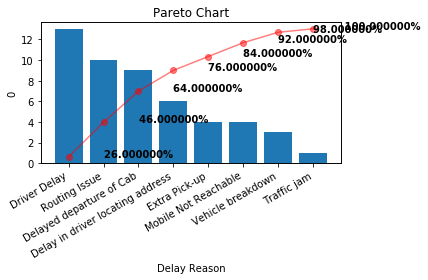

In [85]:
pareto_plot(group_obj, x='Delay Reason', y=0, title='Pareto Chart', pct_format='{0:20%}')

# Answer 2  ↓

In [98]:
import datetime
df1 = pd.read_excel('New_Excel_Test.xls',sheetname=2)[8:]
df1.rename(columns = {"Unnamed: 1" : "Date (mm/dd/yyyy)",
                     "QUESTION 2" : "Date (yyyymmdd.000)"
                  },inplace = True)

df1['Date (mm/dd/yyyy)'] = pd.to_datetime(df1['Date (yyyymmdd.000)'],format='%Y%m%d.000').dt.strftime('%m/%d/%Y')
df1

,Date (yyyymmdd.000),Date (mm/dd/yyyy)
8,20051220.000,12/20/2005
9,20061202.000,12/02/2006
10,20070112.000,01/12/2007
11,20070519.000,05/19/2007
12,20070523.000,05/23/2007
13,20070623.000,06/23/2007
14,20070624.000,06/24/2007
15,20071017.000,10/17/2007
16,20080419.000,04/19/2008


In [261]:
import pandas as pd
df2 = pd.read_excel('New_Excel_Test.xls',sheetname=3)[12:].reset_index().drop('index',axis=1)

In [262]:
df2.columns = df2.iloc[0]

In [263]:
df2=df2.drop(0,axis=0)

In [264]:
df2['Start\nWork'] = pd.to_datetime(df2['Start\nWork'],format='%H:%M:%S')
df2['Time Out\n(Lunch)'] = pd.to_datetime(df2['Time Out\n(Lunch)'],format='%H:%M:%S')
df2['Time In\n(Lunch)'] = pd.to_datetime(df2['Time In\n(Lunch)'],format='%H:%M:%S')
df2['End\nWork'] = pd.to_datetime(df2['End\nWork'],format='%H:%M:%S')
# df2

In [265]:
import datetime
df2['Total\nWorking Hours (w/o breaks)']=df2['End\nWork'].subtract(df2['Time In\n(Lunch)']).add(df2['Time Out\n(Lunch)'].subtract(df2['Start\nWork']))
df2['Start\nWork'] = pd.to_datetime(df2['Start\nWork'],format='%H:%M:%S').dt.strftime('%H:%M:%S')
df2['Time Out\n(Lunch)'] = pd.to_datetime(df2['Time Out\n(Lunch)'],format='%H:%M:%S').dt.strftime('%H:%M:%S')
df2['Time In\n(Lunch)'] = pd.to_datetime(df2['Time In\n(Lunch)'],format='%H:%M:%S').dt.strftime('%H:%M:%S')
df2['End\nWork'] = pd.to_datetime(df2['End\nWork'],format='%H:%M:%S').dt.strftime('%H:%M:%S')

# Answer 3  ↓

In [266]:
df2['Weekly\nHours(cumulative)'] = df2['Total\nWorking Hours (w/o breaks)'].dt.total_seconds().cumsum()/3600
df2['Total\nWorking Hours (w/o breaks)'] = df2['Total\nWorking Hours (w/o breaks)'].dt.total_seconds()/3600
df2.iloc[9,3]=df2.iloc[4,7]
df2.replace({pd.NaT:''},inplace=True)
df2 = df2.fillna('')
df2

,Weekday,Date,Start Work,Time Out (Lunch),Time In (Lunch),End Work,Total Working Hours (w/o breaks),Weekly Hours(cumulative)
1,MONDAY,2003-01-27 00:00:00,08:00:00,12:00:00,13:00:00,18:00:00,9,9
2,TUESDAY,2003-01-28 00:00:00,10:00:00,14:00:00,14:30:00,19:00:00,8.5,17.5
3,WEDNESDAY,2003-01-29 00:00:00,09:00:00,12:00:00,13:00:00,18:30:00,8.5,26
4,THURSDAY,2003-01-30 00:00:00,07:30:00,11:30:00,12:00:00,18:30:00,10.5,36.5
5,FRIDAY,2003-01-31 00:00:00,09:30:00,14:00:00,15:30:00,17:00:00,6,42.5
6,SATURDAY,2003-02-01 00:00:00,NaT,NaT,NaT,NaT,,
7,SUNDAY,2003-02-02 00:00:00,NaT,NaT,NaT,NaT,,
8,,,NaT,NaT,NaT,NaT,,
9,WEEKLY TOTAL,,NaT,NaT,NaT,NaT,,
10,Total hours:,,NaT,42.5,NaT,NaT,,


In [309]:
df3 = pd.read_excel('New_Excel_Test.xls',sheetname=4)

In [310]:
df3 = df3.iloc[7:,0:2]
df3.columns = df3.iloc[0]
df3=df3.drop(7)

In [311]:
import numpy as np
bins = [0, 40, 50, 79, 89,100]
df3['Grades'] =df3['Grades'].astype(int)
df3['binned'] = pd.cut(df3['Grades'], bins=bins)

In [312]:
df3= df3.groupby('binned').size()[::-1].reset_index()

In [314]:
df3.columns=['Grade','Frequency']

# Answer 4  ↓

In [315]:
df3

,Grade,Frequency
0,"(89, 100]",11
1,"(79, 89]",10
2,"(50, 79]",19
3,"(40, 50]",6
4,"(0, 40]",4


In [320]:
df4 = pd.read_excel('New_Excel_Test.xls',sheetname=5)
df4.columns= df4.iloc[12]
df4 = df4[13:]

In [322]:
df4.head()

12,Date,Amount,AcctType,OpenedBy,Branch,Customer
13,2000-09-01 00:00:00,340,Checking,New Accts,Central,Existing
14,2000-09-01 00:00:00,15759,CD,Teller,Westside,Existing
15,2000-09-01 00:00:00,15276,CD,New Accts,North County,Existing
16,2000-09-01 00:00:00,12000,CD,New Accts,Westside,Existing
17,2000-09-01 00:00:00,5000,CD,New Accts,North County,Existing


# Answer 5 Question 1  ↓

In [331]:
df4.groupby(['Branch','AcctType']).agg({'Amount':'sum'})

Amount
Branch       AcctType        
Central      CD        859438
             Checking  203208
             IRA        68380
             Savings   332349
North County CD        830139
             Checking   92225
             IRA       134374
             Savings   152607
Westside     CD        344962
             Checking   90597
             IRA        10000
             Savings   154000

# Answer 5 Question 2  ↓

In [333]:
df4.groupby(['Branch','AcctType']).size().reset_index()

,Branch,AcctType,0
0,Central,CD,44
1,Central,Checking,87
2,Central,IRA,8
3,Central,Savings,38
4,North County,CD,31
5,North County,Checking,25
6,North County,IRA,15
7,North County,Savings,26
8,Westside,CD,23
9,Westside,Checking,34


In [356]:
df5=df4.groupby(['OpenedBy','AcctType']).size().reset_index()
df5 = df5[df5['OpenedBy']=='Teller'].sort_values(by=0,ascending=False).head(1)

# Answer 5 Question 3 ↓

In [357]:
df5

,OpenedBy,AcctType,0
5,Teller,Checking,19


# Answer 5 Question 4  ↓

In [363]:
df6=df4.groupby(['Branch','Customer']).size().reset_index()
df6[df6.Customer=='New'].nlargest(1,0)

,Branch,Customer,0
1,Central,New,34


In [412]:
from io import StringIO
df8=pd.read_csv(StringIO('''User ID	User Name	Age	State
1	Naman	29	Haryana
2	Ayush	24	Gujarat
3	Kritika	21	Haryana
4	Geetika	23	Haryana
5	Manoj	34	Haryana
6	Mayuri	32	Delhi'''),delimiter='\t')
df9= pd.read_csv(StringIO('''User ID	Order ID	Product	Order Date
1	a	HA	20-10-2019
1	b	PA	25-10-2019
2	a	HA	01-11-2019
3	a	HB	03-11-2019
3	b	PB	28-11-2019
3	c	PA	01-12-2019
5	a	HA	05-10-2019
6	a	HA	01-09-2019
6	c	PB	04-11-2019
'''),delimiter='\t')
df9

,User ID,Order ID,Product,Order Date
0,1,a,HA,20-10-2019
1,1,b,PA,25-10-2019
2,2,a,HA,01-11-2019
3,3,a,HB,03-11-2019
4,3,b,PB,28-11-2019
5,3,c,PA,01-12-2019
6,5,a,HA,05-10-2019
7,6,a,HA,01-09-2019
8,6,c,PB,04-11-2019


# Answer 8 Question 1 inner join  ↓

In [415]:
pd.merge(df8,df9,how='inner',on='User ID').shape[0]

9

# Answer 8 Question 1 left join  ↓

In [416]:
pd.merge(df8,df9,how='left',on='User ID').shape[0]

10

# Answer 8 Question 1 right join  ↓

In [419]:
pd.merge(df8,df9,how='right',on='User ID').shape[0]

9

In [420]:
import pandasql as ps

# Answer 8 Question 2,3,4 sql queries ↓ df8 is user table df9 is Order table

In [451]:
q2 = """
SELECT 'USER ID',count(Product) fROM df9 where month('%m',date('Order Date')) in (10,11);
"""

q3 = '''
select distinct(df9.'USER ID') from df9 join df8 on df9.'USER ID'=df8.'USER ID' where month('%m',date('Order Date'))=10 and State='Haryana';
'''
q4 = '''
CREATE PROCEDURE FindUSER(@Userid ) 
AS BEGIN

select * from df9 where 'Order Date'=MAX('Order Date') and 'USER ID' = @Userid;
'''


   User ID
0        1
1        3
2        5


# Answer 9 ↓ select max salary but which is less than max salary 

In [ ]:
SELECT max(salary) FROM EMPLOYEE WHERE salary < (SELECT max(salary) FROM EMPLOYEE);